In [1]:
from google.colab import files
uploaded = files.upload()

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

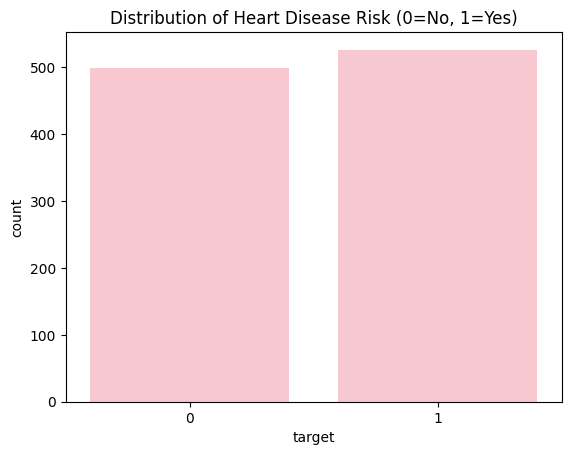

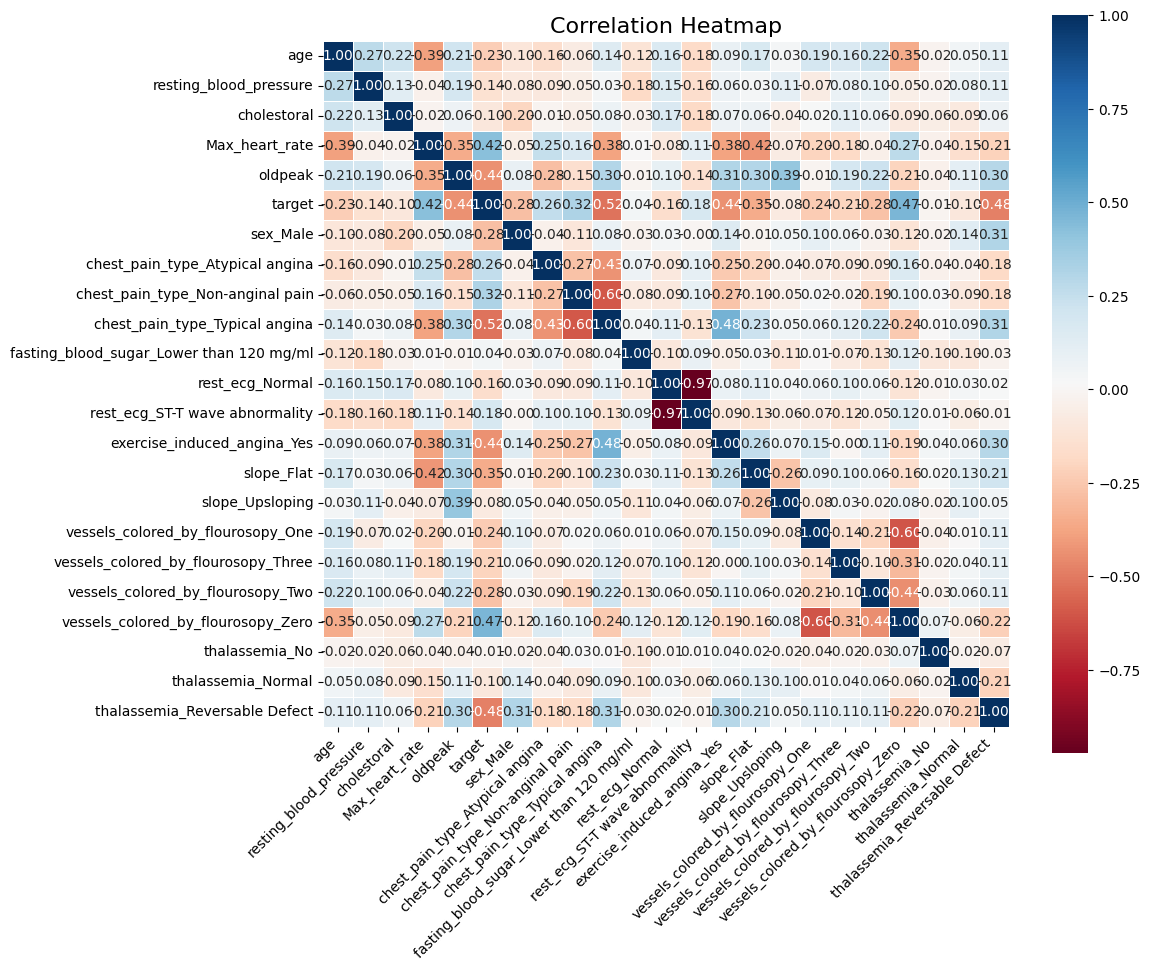

Accuracy: 0.8146341463414634


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


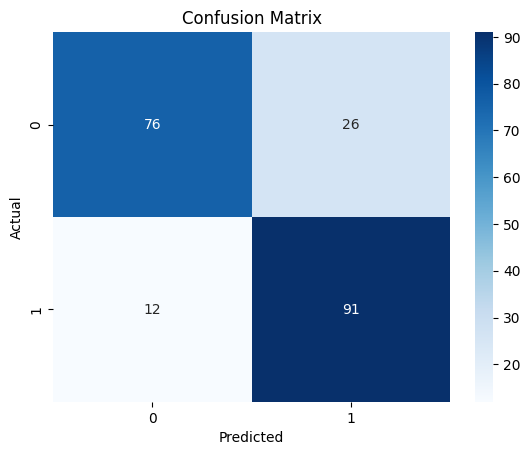


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



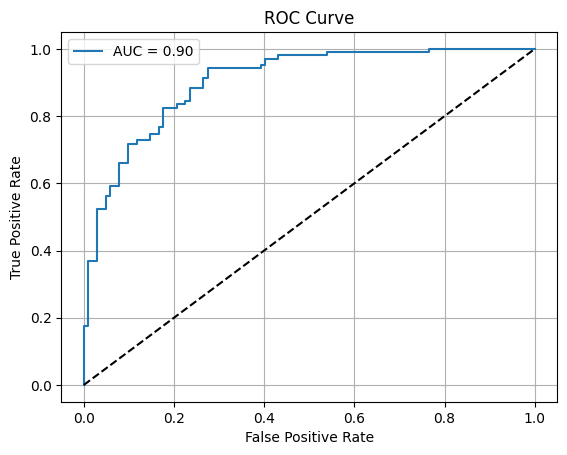

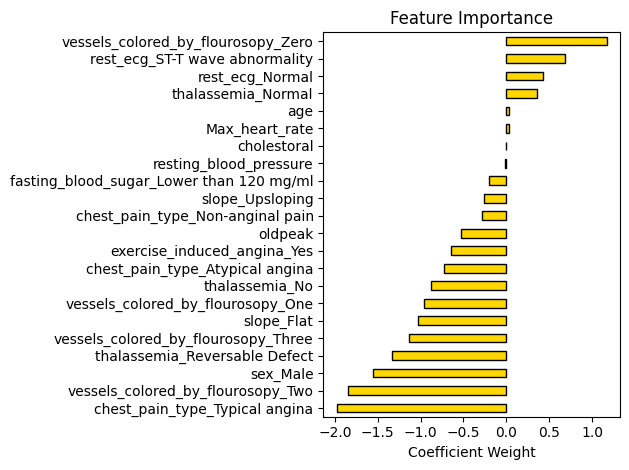

In [9]:
# 📘 Task 3: Heart Disease Prediction

# 🧩 Problem Statement:
# Predict whether a patient is at risk of heart disease based on various medical attributes
# using a classification model.

# 🎯 Goal:
# Use Logistic Regression to classify patients as high-risk (1) or low-risk (0).
# Evaluate the model using accuracy, confusion matrix, classification report, and ROC curve.

# Install required packages (run once in Google Colab)
!pip install seaborn scikit-learn
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Basic info
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
# View basic structure
df.head()
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Convert all categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# View encoded column names
print(df_encoded.columns)

# Target distribution
sns.countplot(x='target', data=df, color='pink')
plt.title("Distribution of Heart Disease Risk (0=No, 1=Yes)")
plt.show()

# Correlation Heatmap (only numeric data)
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_encoded.corr(),         # only numeric columns
    annot=True,                # show correlation values
    fmt=".2f",                 # show only 2 decimal places
    cmap="RdBu",           # strong color contrast (blue–red)
    cbar=True,                 # show color bar
    square=True,               # square boxes
    linewidths=0.5,            # add lines between boxes
    linecolor='white',         # line color
    annot_kws={"size": 10}     # font size for numbers
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Split the data
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
# Train logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Show feature importance for Logistic Regression
feature_weights = pd.Series(model.coef_[0], index=X.columns)
feature_weights.sort_values().plot(
    kind='barh',
    title="Feature Importance",
    color='gold',           #  change bar color to pink
    edgecolor='black'       # optional: black border for clarity
)
plt.xlabel("Coefficient Weight")
plt.tight_layout()
plt.show()

